In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [5]:
df=pd.read_csv('TicketData.csv')
df.head()

,Ticket ID,Ticket Summary,Priority,Team(Module/Domain/Tech)
0,INCC00009587358,e2e-srv-01:Custom Timer Location:e2e-srv-01.os...,High,CG.SAP ADM Technical Support
1,INCC00009584433,INEX_201_OQ_DB_Status_Critical - MSSQLSERVER:I...,High,CG.SAP ADM Technical Support
2,INCC00009584185,INLBPHN4/194.111.74.140 is not reachable from ...,Medium,CG.SAP ADM Technical Support
3,INCC00009584184,INLBPHN5/194.111.74.141 is not reachable from ...,Medium,CG.SAP ADM Technical Support
4,INCC00009584157,e2e-srv-01:Transaction:BO Inex:Maximum Transac...,High,CG.SAP ADM Technical Support


In [132]:
df = df.drop(['Ticket ID', 'Priority'], axis=1)
df.head()

,Ticket Summary,Team(Module/Domain/Tech)
0,e2e-srv-01:Custom Timer Location:e2e-srv-01.os...,CG.SAP ADM Technical Support
1,INEX_201_OQ_DB_Status_Critical - MSSQLSERVER:I...,CG.SAP ADM Technical Support
2,INLBPHN4/194.111.74.140 is not reachable from ...,CG.SAP ADM Technical Support
3,INLBPHN5/194.111.74.141 is not reachable from ...,CG.SAP ADM Technical Support
4,e2e-srv-01:Transaction:BO Inex:Maximum Transac...,CG.SAP ADM Technical Support


In [133]:
df.isna().sum()

Ticket Summary              0
Team(Module/Domain/Tech)    0
dtype: int64

In [134]:
df.shape

(7661, 2)

In [135]:
df.nunique()

Ticket Summary              3022
Team(Module/Domain/Tech)      16
dtype: int64

In [136]:
df = df.drop_duplicates(subset='Ticket Summary', keep='first', inplace=False)

In [137]:
df.shape

(3022, 2)

In [138]:
df.nunique()

Ticket Summary              3022
Team(Module/Domain/Tech)      16
dtype: int64

In [139]:
df.describe()

,Ticket Summary,Team(Module/Domain/Tech)
count,3022,3022
unique,3022,16
top,inip1a06:System Performance::System Uptime:0.0...,CG.SAP ADM Integration
freq,1,988


In [140]:
df['Team(Module/Domain/Tech)'].unique()

array(['CG.SAP ADM Technical Support', 'CG MUM.SAP ADM Service Desk',
       'CG MUM.SAP ADM Integration', 'CG MUM.SAP ADM Technical Support',
       'CG MUM.SAP ADM Logistics & Production',
       'CG.SAP ADM Logistics & Production',
       'CG MUM.SAP ADM Analysis & Presentation',
       'CG.SAP ADM Analysis & Presentation', 'CG.SAP ADM Integration',
       'CG.SAP ADM Service Desk', 'CG.SAP ADM Finance & Control',
       'CG.SAP ADM Knowledge Management', 'CG.SAP ADM Version management',
       'CG.SAP ADM Gate-Way', 'CG SAM Service L1.5 Support',
       'CG.SAP ADM Human Capital Mgmt'], dtype=object)

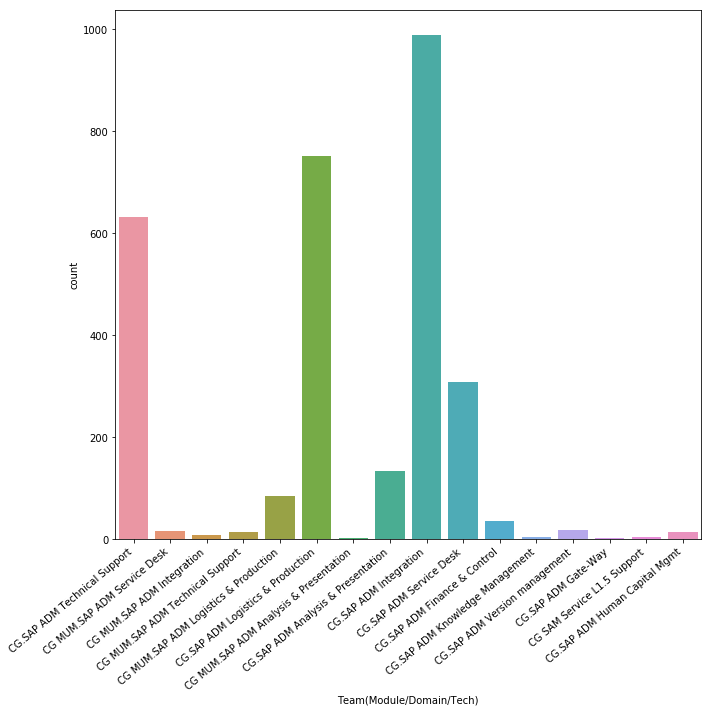

In [141]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(df['Team(Module/Domain/Tech)'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [1]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Ticket Summary'])
print(len(bow_transformer.vocabulary_))

NameError: name 'df' is not defined

In [98]:
df['Ticket Summary'] = bow_transformer.transform(df['Ticket Summary'])

In [118]:
df.head(1)

,Ticket Summary,Team(Module/Domain/Tech)
0,"(0, 1551)\t1\n (0, 1751)\t1\n (0, 2201)\t1...",CG.SAP ADM Technical Support


In [143]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [144]:
messages_tfidf=TfidfTransformer.transform(df['Ticket Summary'])

TypeError: transform() missing 1 required positional argument: 'X'

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [146]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Ticket Summary'])

In [147]:
print(vectorizer.get_feature_names())

['00', '0002', '0003', '0004', '00044728', '0005', '001400009609', '0018', '0022', '0024', '0034', '0036', '0050569bd9', '01', '0104022344', '01042019', '015200003387', '01578', '01st', '02', '0207', '0207414415', '022', '0237897240', '024347020', '025372415', '03', '032132577', '034', '038729750', '04', '046', '05', '0504', '0510860', '06', '06052019', '063222554', '064566831', '067', '07', '0750', '08', '09', '0925869200', '093212901', '0947650380', '0947747750', '097275565', '097590', '09to24b', '0pv', '10', '100', '1000', '1006064', '103', '1060274125', '107221', '107344', '107446', '107448', '1079118', '109', '1091655', '11', '1100', '111', '11732759', '11777385', '12', '1200', '12401', '12kg', '13', '130', '1318320', '134097', '1341628', '136266', '136548', '136565', '137', '137147', '138', '14', '140', '141', '141429', '149023', '149437', '149452', '149488', '149514', '149518', '15', '150', '150g', '152336', '152460', '16', '16576', '16th', '17', '1730', '17736', '17754', '17759

In [148]:
print(X.shape)

(3022, 2580)


In [149]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X,df['Ticket Summary'])

In [150]:
all_predictions = spam_detect_model.predict(X)
print(all_predictions)

['e2e-srv-01:Custom Timer Location:e2e-srv-01.osfinland::exe-03::SYN:Availability Error Count:1 with t'
 'INEX_201_OQ_DB_Status_Critical - MSSQLSERVER:INLBODD1:MSS - 2019-03-27 18:28:12 EET - [The current d'
 'INLBPHN4/194.111.74.140 is not reachable from ping probe on PINMON02.CAPGEMINI.FI'
 ...
 'INEX_12571_LO_SOLMAN_ERROR_CRIT - Solman_EventLog:INSMPD02:LO - 2019-04-30 22:44:26 EET - alertName '
 'insmpd02:Windows 2003::Memory Usage:95.00 with threshold as 95.0 for application hierarchy '
 'INEX_12571_LO_SOLMAN_ERROR_CRIT - Solman_EventLog:INSMPD02:LO - 2019-04-30 21:49:26 EET - alertName ']


In [152]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df['Ticket Summary'],all_predictions))
print(confusion_matrix(df['Ticket Summary'],all_predictions))

                                                                                                      precision    recall  f1-score   support

                                       "SAP NetWeaver Alerts | Infrastructure Alerts | System Logs |       1.00      1.00      1.00         1
                                                                       (SAP) - Transport Request IT3       1.00      1.00      1.00         1
             (SAP) - Transport Request IT3  <NodeBill -> ostotilauslaji ZTER - VH1829 Herkkukeittiö>       1.00      1.00      1.00         1
                   (SAP) - Transport Request IT3  <PT1699 Palletlable reprinting NodeFlow ja PT1111>       1.00      1.00      1.00         1
              (SAP) - Transport Request IT3  TA1787 / Fix for Talja Monthly Transfer for BS Accounts       1.00      1.00      1.00         1
                         (SAP) - Transport Request IT3 - PT1704 Invoicing / GR/IR report to ALV grid       1.00      1.00      1.00         1
     

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
